# API Data Wrangling with Open-Meteo

In this exercise, we will:

- Fetch historical weather data using the **Open-Meteo API**.
- Parse and clean the data using **pandas**.
- Perform exploratory data analysis.
- Visualize weather trends.

In [1]:
# Install required packages if not already installed
# !pip install requests pandas matplotlib --quiet

In [2]:
# Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Optional: Configure matplotlib for inline display in Jupyter
%matplotlib inline

## Understand the Open-Meteo API

- **API Endpoint**: `https://archive-api.open-meteo.com/v1/archive`
- **Parameters**:
  - `latitude`: Latitude of the location.
  - `longitude`: Longitude of the location.
  - `start_date`: Start date of the data (YYYY-MM-DD).
  - `end_date`: End date of the data (YYYY-MM-DD).
  - `hourly`: Comma-separated list of variables (e.g., temperature, precipitation).
  - `timezone`: Timezone of the data.

**Documentation**: [Open-Meteo API Docs](https://open-meteo.com/en/docs)

In [3]:
# Step 1: Set Up Parameters

# Location coordinates for New York City
latitude = 40.7128
longitude = -74.0060

# Date range
start_date = '2023-01-01'
end_date = '2023-01-07'  # One week of data

# Variables to fetch
hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation']


In [4]:
# Step 2: Make the API Request

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params = {
    'latitude': latitude,
    'longitude': longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/New_York'
}

response = requests.get(base_url, params=params)


In [5]:
# Check if the request was successful

if response.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')


Data fetched successfully!


In [6]:
# Step 3: Load Data into pandas DataFrame

data = response.json()
hourly_data = data['hourly']

df = pd.DataFrame(hourly_data)
df.head()


,time,temperature_2m,relativehumidity_2m,precipitation
0,2023-01-01T00:00,10.5,99,1.0
1,2023-01-01T01:00,10.4,98,0.1
2,2023-01-01T02:00,10.3,96,0.0
3,2023-01-01T03:00,9.7,95,0.0
4,2023-01-01T04:00,9.0,95,0.0


In [7]:
# Step 4: Data Cleaning

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df.set_index('time', inplace=True)

# Check for missing values
df.isnull().sum()


temperature_2m         0
relativehumidity_2m    0
precipitation          0
dtype: int64

In [8]:
# Handle missing values (if any)
df.ffill(inplace=True)  # Forward fill


In [9]:
# Step 5: Exploratory Data Analysis

# Summary Statistics
df.describe()

,temperature_2m,relativehumidity_2m,precipitation
count,168.000000,168.000000,168.000000
mean,8.319048,86.267857,0.136905
std,3.525764,12.804132,0.431063
min,0.400000,45.000000,0.000000
25%,5.875000,81.000000,0.000000
50%,8.200000,90.000000,0.000000
75%,11.100000,97.000000,0.000000
max,17.900000,100.000000,3.100000


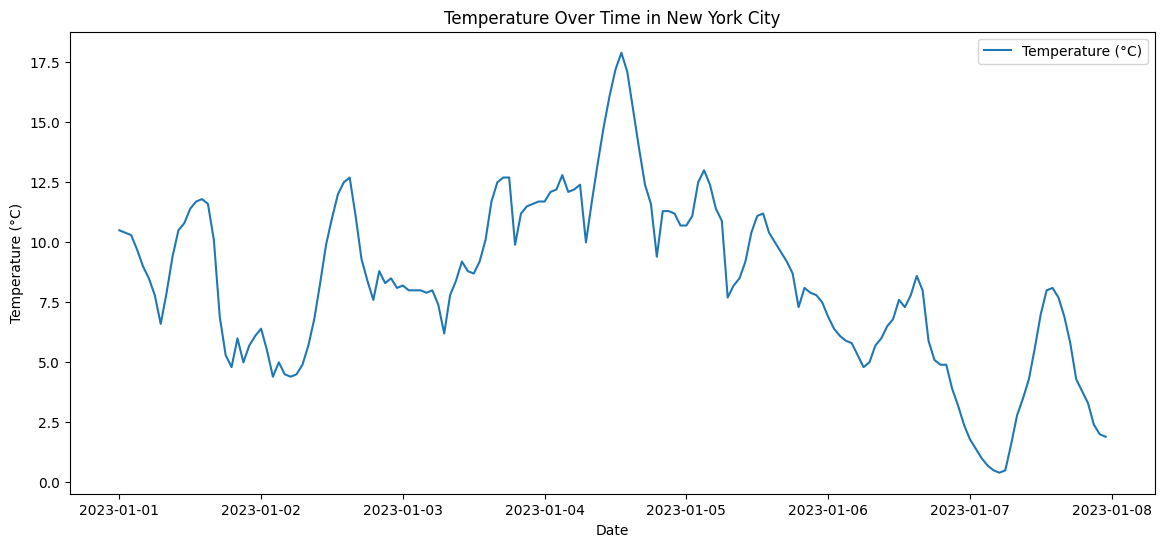

In [10]:
# Plot Temperature Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['temperature_2m'], label='Temperature (°C)')
plt.title('Temperature Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

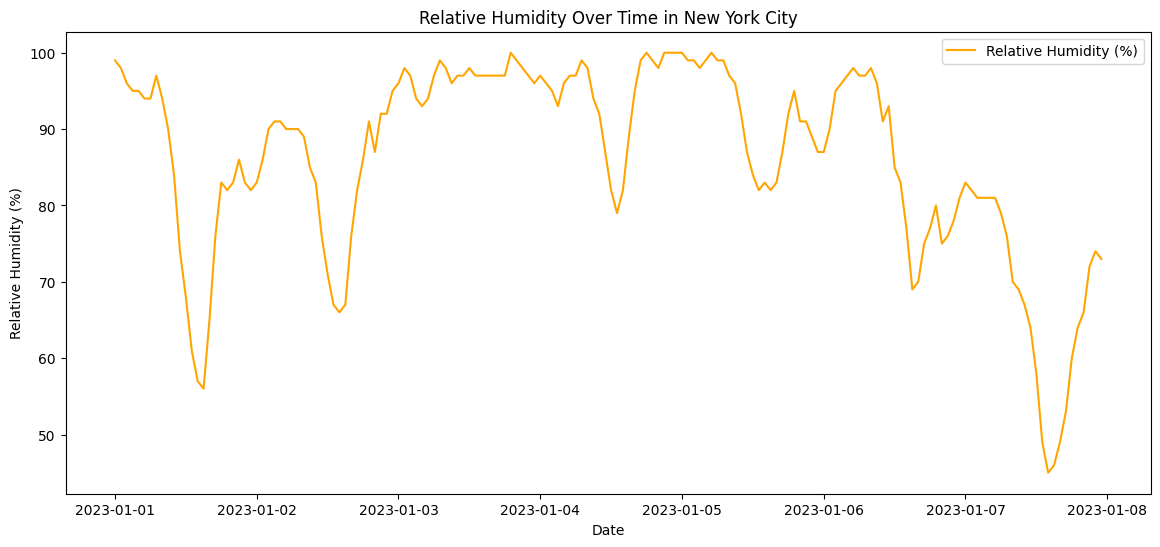

In [11]:
# Plot Relative Humidity Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['relativehumidity_2m'], color='orange', label='Relative Humidity (%)')
plt.title('Relative Humidity Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()


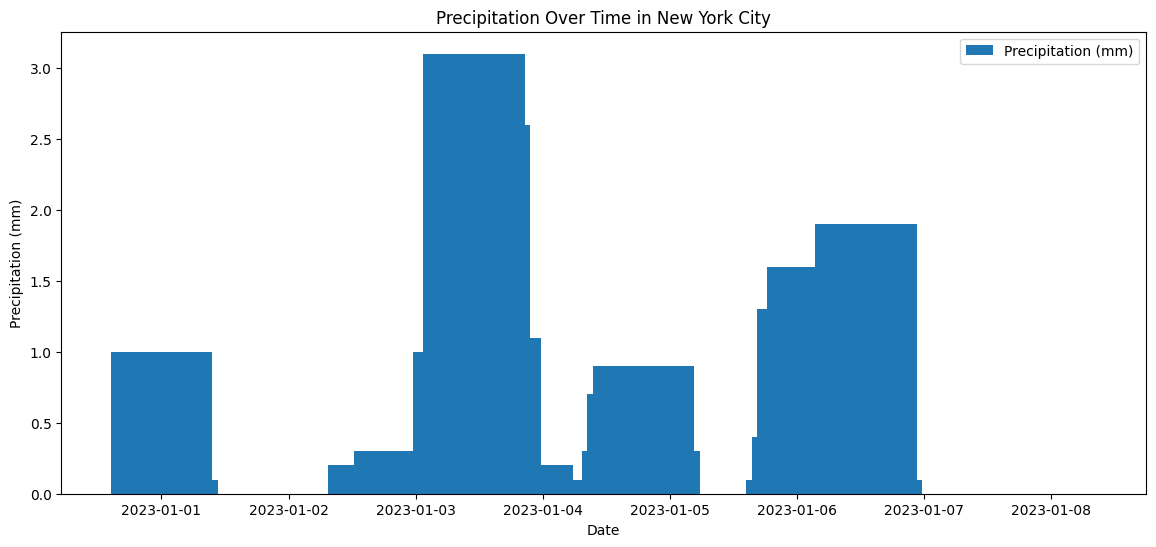

In [12]:
# Plot Precipitation Over Time

plt.figure(figsize=(14, 6))
plt.bar(df.index, df['precipitation'], label='Precipitation (mm)')
plt.title('Precipitation Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()


In [13]:
# Step 6: Correlation Analysis

# Calculate correlation between temperature and humidity
correlation = df['temperature_2m'].corr(df['relativehumidity_2m'])
print(f'Correlation between Temperature and Relative Humidity: {correlation:.2f}')


Correlation between Temperature and Relative Humidity: 0.25


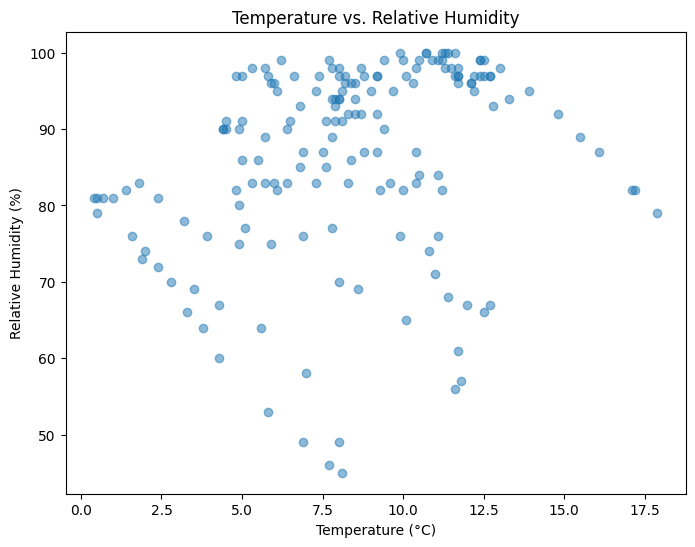

In [14]:
# Scatter Plot of Temperature vs. Relative Humidity

plt.figure(figsize=(8, 6))
plt.scatter(df['temperature_2m'], df['relativehumidity_2m'], alpha=0.5)
plt.title('Temperature vs. Relative Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()


In [15]:
# Step 7: Resample Data to Daily Averages

daily_avg = df.resample('D').mean()
daily_avg.head()


,temperature_2m,relativehumidity_2m,precipitation
time,,,
2023-01-01,8.658333,83.000000,0.045833
2023-01-02,7.858333,84.000000,0.025000
2023-01-03,9.558333,96.916667,0.391667
2023-01-04,12.954167,94.333333,0.095833
2023-01-05,9.783333,92.125000,0.000000


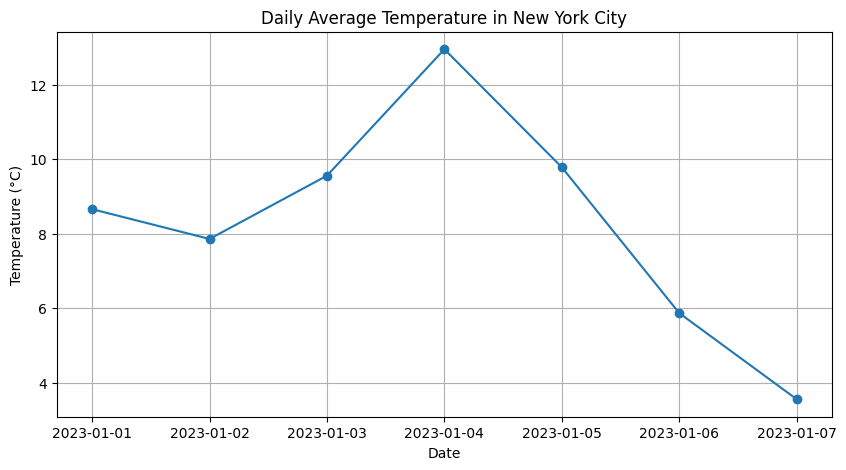

In [16]:
# Plot Daily Average Temperature

plt.figure(figsize=(10, 5))
plt.plot(daily_avg.index, daily_avg['temperature_2m'], marker='o')
plt.title('Daily Average Temperature in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


In [17]:
# Step 8: Compare with Another Location (Los Angeles)

# Coordinates for Los Angeles
latitude_la = 34.0522
longitude_la = -118.2437

params_la = {
    'latitude': latitude_la,
    'longitude': longitude_la,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

response_la = requests.get(base_url, params=params_la)

# Load and clean Los Angeles data
data_la = response_la.json()
hourly_data_la = data_la['hourly']
df_la = pd.DataFrame(hourly_data_la)

df_la['time'] = pd.to_datetime(df_la['time'])
df_la.set_index('time', inplace=True)
df_la.ffill(inplace=True)


In [18]:
# Resample Los Angeles Data to Daily Averages

daily_avg_la = df_la.resample('D').mean()


In [19]:
# Combine DataFrames for Comparison

combined_temp = pd.DataFrame({
    'New York': daily_avg['temperature_2m'],
    'Los Angeles': daily_avg_la['temperature_2m']
})


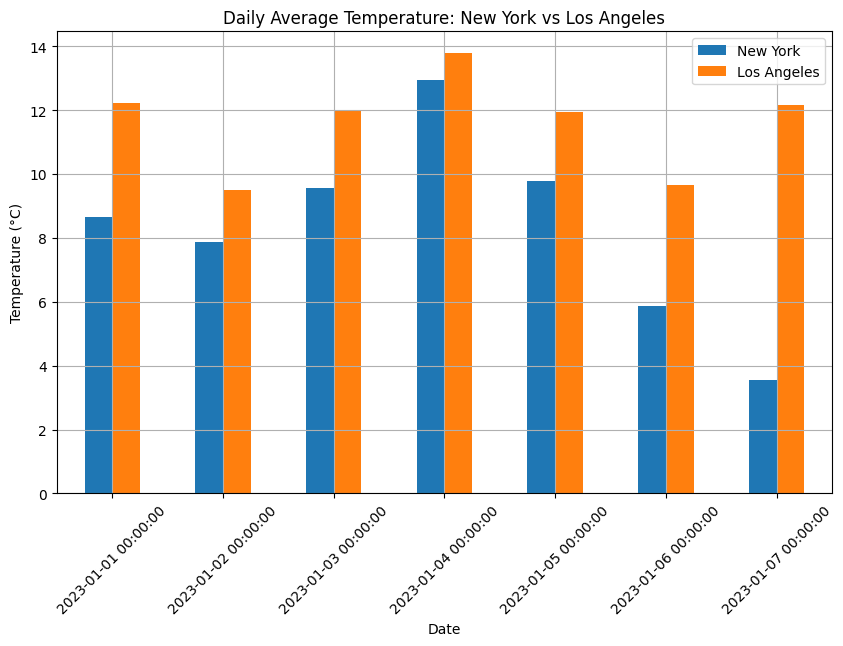

In [20]:
# Plot Comparison of Daily Average Temperature

combined_temp.plot(kind='bar', figsize=(10, 6))
plt.title('Daily Average Temperature: New York vs Los Angeles')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [21]:
# Step 9: Advanced Analysis - Temperature Difference

# Calculate Temperature Difference
combined_temp['Temp Difference'] = combined_temp['Los Angeles'] - combined_temp['New York']
combined_temp


,New York,Los Angeles,Temp Difference
time,,,
2023-01-01,8.658333,12.233333,3.575000
2023-01-02,7.858333,9.495833,1.637500
2023-01-03,9.558333,11.970833,2.412500
2023-01-04,12.954167,13.775000,0.820833
2023-01-05,9.783333,11.950000,2.166667
2023-01-06,5.866667,9.662500,3.795833
2023-01-07,3.554167,12.154167,8.600000


In [22]:
# Step 10: Save Data to CSV (Optional)

# Save New York data
df.to_csv('new_york_weather.csv')

# Save Los Angeles data
df_la.to_csv('los_angeles_weather.csv')


## Conclusion

In this exercise, we:

- Accessed and retrieved data from the **Open-Meteo API**.
- Cleaned and preprocessed JSON data using **pandas**.
- Performed exploratory data analysis and visualization.
- Compared weather patterns between **New York City** and **Los Angeles**.

---

**Next Steps**:

- **Extend the Date Range**: Analyze seasonal trends by fetching data over several months.
- **Fetch Additional Variables**: Include wind speed, atmospheric pressure, or other interesting variables.
- **Forecasting**: Use statistical methods or machine learning models to forecast future weather patterns.
- **Global Analysis**: Compare data from other global cities to gain broader insights.


## Exercises for Students

Now it's your turn! Below are some exercises to reinforce what you've learned. Try to complete them without looking at the solutions.

### Exercise: Compare Rainfall Between London and Seattle

- **Objective**: Compare the total weekly rainfall between London and Seattle over a full year.
- **Tasks**:
  1. **Fetch Data**: Retrieve hourly precipitation data for London and Seattle for the year 2022.
     - **London Coordinates**: Latitude `51.5074`, Longitude `-0.1278`
     - **Seattle Coordinates**: Latitude `47.6062`, Longitude `-122.3321`
  2. **Data Cleaning**: Convert the time columns to datetime objects and set them as the index. Handle any missing values.
  3. **Resample Data**: Resample the hourly data to weekly totals.
  4. **Visualization**: Plot the weekly total precipitation for both cities on the same graph.
  5. **Analysis**: Determine which city had more rainfall overall and identify any interesting patterns.

**Note**: Remember to handle any API limitations, such as data availability or rate limits, and to be mindful of the size of the data you're requesting.

### Tips:

- **API Parameters**: Make sure to adjust the parameters like `latitude`, `longitude`, `start_date`, `end_date`, `hourly`, and `timezone` as needed.
- **Error Handling**: Always check if your API requests are successful before proceeding.
- **Data Storage**: Consider saving your DataFrames to CSV files for future analysis.
- **Visualization**: Customize your plots with titles, labels, legends, and gridlines for better readability.

Happy coding!


In [46]:
# Set up parameters for London

# Location and Coordinated for London
latitude = 51.5074
longitude = -0.1278

# Date range
start_date = '2022-01-01'
end_date = '2023-01-01'  # One year of data

# Variables to fetch
hourly_variables_l = ['temperature_2m', 'relativehumidity_2m', 'precipitation','rain','showers']
# daily=precipitation_hours

In [47]:
# Step2 - API request

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params = {
    'latitude': latitude,
    'longitude': longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables_l),
    'timezone': 'Europe/London'
}

response_london = requests.get(base_url, params=params)

In [48]:
if response_london.status_code ==200:
    print('Data fetched successfully')
else:
    print(f'Failed to fetch data. Status code: {response_london.status_code}')

Data fetched successfully


In [49]:
# load the response from API to a variable
data_london = response_london.json()

# Get the hourly key - data
hourly_data_london = data_london['hourly']

# convert dict data to DataFrame
df_london = pd.DataFrame(hourly_data_london)
df_london.head()

,time,temperature_2m,relativehumidity_2m,precipitation,rain,showers
0,2022-01-01T00:00,12.7,93,0.0,0.0,0.0
1,2022-01-01T01:00,12.8,93,0.0,0.0,0.0
2,2022-01-01T02:00,12.5,93,0.0,0.0,0.0
3,2022-01-01T03:00,12.3,92,0.0,0.0,0.0
4,2022-01-01T04:00,11.9,93,0.0,0.0,0.0


In [50]:
df_london['time'] = pd.to_datetime(df_london['time'])


df_london.set_index('time', inplace=True)
df_london.head()

,temperature_2m,relativehumidity_2m,precipitation,rain,showers
time,,,,,
2022-01-01 00:00:00,12.7,93,0.0,0.0,0.0
2022-01-01 01:00:00,12.8,93,0.0,0.0,0.0
2022-01-01 02:00:00,12.5,93,0.0,0.0,0.0
2022-01-01 03:00:00,12.3,92,0.0,0.0,0.0
2022-01-01 04:00:00,11.9,93,0.0,0.0,0.0


In [51]:
df_london.isnull().mean()

temperature_2m         0.0
relativehumidity_2m    0.0
precipitation          0.0
rain                   0.0
showers                0.0
dtype: float64

In [52]:
df_london.ffill(inplace=True)

In [53]:
#EDA
df_london.describe()

,temperature_2m,relativehumidity_2m,precipitation,rain,showers
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.0
mean,12.008367,76.652664,0.075945,0.075774,0.0
std,6.643430,16.705911,0.404172,0.404090,0.0
min,-5.400000,17.000000,0.000000,0.000000,0.0
25%,7.500000,65.000000,0.000000,0.000000,0.0
50%,11.900000,81.000000,0.000000,0.000000,0.0
75%,16.400000,90.000000,0.000000,0.000000,0.0
max,38.000000,100.000000,14.700000,14.700000,0.0


In [54]:
print(df_london['showers'].unique()) # unique values
print(df_london['showers'].nunique()) # number of unique values

[0.]
1


In [55]:
#removing the showers columns as it has no data to represent all it's values are zeroes and it has one value
df_london = df_london.drop(columns=['showers'])

In [56]:
df_london.head()

,temperature_2m,relativehumidity_2m,precipitation,rain
time,,,,
2022-01-01 00:00:00,12.7,93,0.0,0.0
2022-01-01 01:00:00,12.8,93,0.0,0.0
2022-01-01 02:00:00,12.5,93,0.0,0.0
2022-01-01 03:00:00,12.3,92,0.0,0.0
2022-01-01 04:00:00,11.9,93,0.0,0.0


In [58]:
df_london_weekly = df_london.resample('W').mean()
df_london_weekly.head()

,temperature_2m,relativehumidity_2m,precipitation,rain
time,,,,
2022-01-02,11.993750,86.458333,0.045833,0.045833
2022-01-09,4.238690,86.089286,0.076786,0.076786
2022-01-16,3.532143,94.696429,0.018452,0.018452
2022-01-23,2.617262,89.416667,0.000000,0.000000
2022-01-30,4.838690,86.476190,0.002381,0.002381


In [63]:
df_london_weekly.describe()

,temperature_2m,relativehumidity_2m,precipitation,rain
count,53.000000,53.000000,53.000000,53.000000
mean,12.008170,76.784816,0.075539,0.075371
std,5.694578,9.615508,0.081057,0.081154
min,-1.020238,53.035714,0.000000,0.000000
25%,8.233333,70.833333,0.018452,0.018452
50%,12.148214,76.654762,0.045833,0.045833
75%,15.912500,85.410714,0.104167,0.104167
max,23.032143,94.696429,0.403571,0.403571


#<i> London DATASET </i>

In [34]:
# Set up parameters
# Location and Coordinated for Seattle
latitude = 47.6062
longitude = -122.3321

# Date range
start_date = '2022-01-01'
end_date = '2023-01-01'  # One year of data

# Variables to fetch
hourly_variables_s = ['temperature_2m', 'relativehumidity_2m', 'precipitation','rain','showers']

In [35]:
# Step2 - API request

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params = {
    'latitude': latitude,
    'longitude': longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables_s),
    'timezone': 'America/Los_Angeles'
}

response_seattle = requests.get(base_url, params=params)

In [36]:
if response_seattle.status_code ==200:
    print('Data fetched successfully')
else:
    print(f'Failed to fetch data. Status code: {response_seattle.status_code}')

Data fetched successfully


In [37]:
data_seattle = response_seattle.json()

data_seattle_hourly = data_seattle['hourly']

df_seattle = pd.DataFrame(data_seattle_hourly)
df_seattle.head()

,time,temperature_2m,relativehumidity_2m,precipitation,rain,showers
0,2022-01-01T00:00,-6.4,76,0.0,0.0,0.0
1,2022-01-01T01:00,-8.3,82,0.0,0.0,0.0
2,2022-01-01T02:00,-8.1,82,0.0,0.0,0.0
3,2022-01-01T03:00,-7.9,81,0.0,0.0,0.0
4,2022-01-01T04:00,-6.2,73,0.0,0.0,0.0


In [38]:
df_seattle['time'] = pd.to_datetime(df_seattle['time'])

df_seattle.set_index('time', inplace=True)
df_seattle.head()

,temperature_2m,relativehumidity_2m,precipitation,rain,showers
time,,,,,
2022-01-01 00:00:00,-6.4,76,0.0,0.0,0.0
2022-01-01 01:00:00,-8.3,82,0.0,0.0,0.0
2022-01-01 02:00:00,-8.1,82,0.0,0.0,0.0
2022-01-01 03:00:00,-7.9,81,0.0,0.0,0.0
2022-01-01 04:00:00,-6.2,73,0.0,0.0,0.0


In [39]:
df_seattle.isnull().mean()

temperature_2m         0.0
relativehumidity_2m    0.0
precipitation          0.0
rain                   0.0
showers                0.0
dtype: float64

In [40]:
df_seattle.ffill(inplace=True)

In [41]:
df_seattle.describe()

,temperature_2m,relativehumidity_2m,precipitation,rain,showers
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.0
mean,10.470162,78.218693,0.128848,0.118488,0.0
std,6.639791,14.037794,0.463136,0.425767,0.0
min,-8.300000,20.000000,0.000000,0.000000,0.0
25%,5.400000,69.000000,0.000000,0.000000,0.0
50%,9.700000,82.000000,0.000000,0.000000,0.0
75%,15.200000,89.000000,0.000000,0.000000,0.0
max,31.100000,100.000000,7.700000,6.200000,0.0


In [42]:
print(df_seattle['showers'].unique())
print(df_seattle['showers'].nunique())

[0.]
1


In [43]:
print((df_seattle['precipitation'] - df_seattle['rain']).unique())

[0.  0.6 2.2 1.  1.1 1.1 0.9 2.8 5.5 6.9 6.2 2.9 0.4 1.3 0.2 1.7 0.6 0.5
 0.1 0.3 0.1 1.3 0.3 1.  0.2 0.3 0.8 0.1 0.6 0.2 0.1 1.6 0.4 0.1 1.2 1.9
 1.8 1.7 2.6 1.5 1.4 0.9 0.2 0.7 0.9 3.3 0.3 0.7]


In [44]:
#removing the showers columns as it has no data to represent all it's values are zeroes and it has one value
df_seattle = df_seattle.drop(columns=['showers'])

In [45]:
df_seattle.head()

,temperature_2m,relativehumidity_2m,precipitation,rain
time,,,,
2022-01-01 00:00:00,-6.4,76,0.0,0.0
2022-01-01 01:00:00,-8.3,82,0.0,0.0
2022-01-01 02:00:00,-8.1,82,0.0,0.0
2022-01-01 03:00:00,-7.9,81,0.0,0.0
2022-01-01 04:00:00,-6.2,73,0.0,0.0


In [60]:
df_seattle_weekly = df_seattle.resample('W').mean()
df_seattle_weekly.head()

,temperature_2m,relativehumidity_2m,precipitation,rain
time,,,,
2022-01-02,-0.516667,75.520833,0.797917,0.208333
2022-01-09,3.821429,86.404762,0.605952,0.532738
2022-01-16,6.336310,91.232143,0.270833,0.270833
2022-01-23,5.741667,90.684524,0.093452,0.093452
2022-01-30,2.622024,79.470238,0.039286,0.039286


In [62]:
df_seattle_weekly.describe() # weekly statistics

,temperature_2m,relativehumidity_2m,precipitation,rain
count,53.000000,53.000000,53.000000,53.000000
mean,10.322091,78.182334,0.137865,0.119699
std,6.093281,7.103720,0.166607,0.132339
min,-0.516667,59.434524,0.000000,0.000000
25%,5.701190,72.571429,0.012500,0.011310
50%,9.105952,78.125000,0.064286,0.056548
75%,16.236905,83.636905,0.217262,0.205952
max,22.641667,91.232143,0.797917,0.532738


In [64]:
combined_weekly_rain = pd.DataFrame({"london_weekly_rain":df_london_weekly['rain'],"seattle_weekly_rain":df_seattle_weekly['rain']})

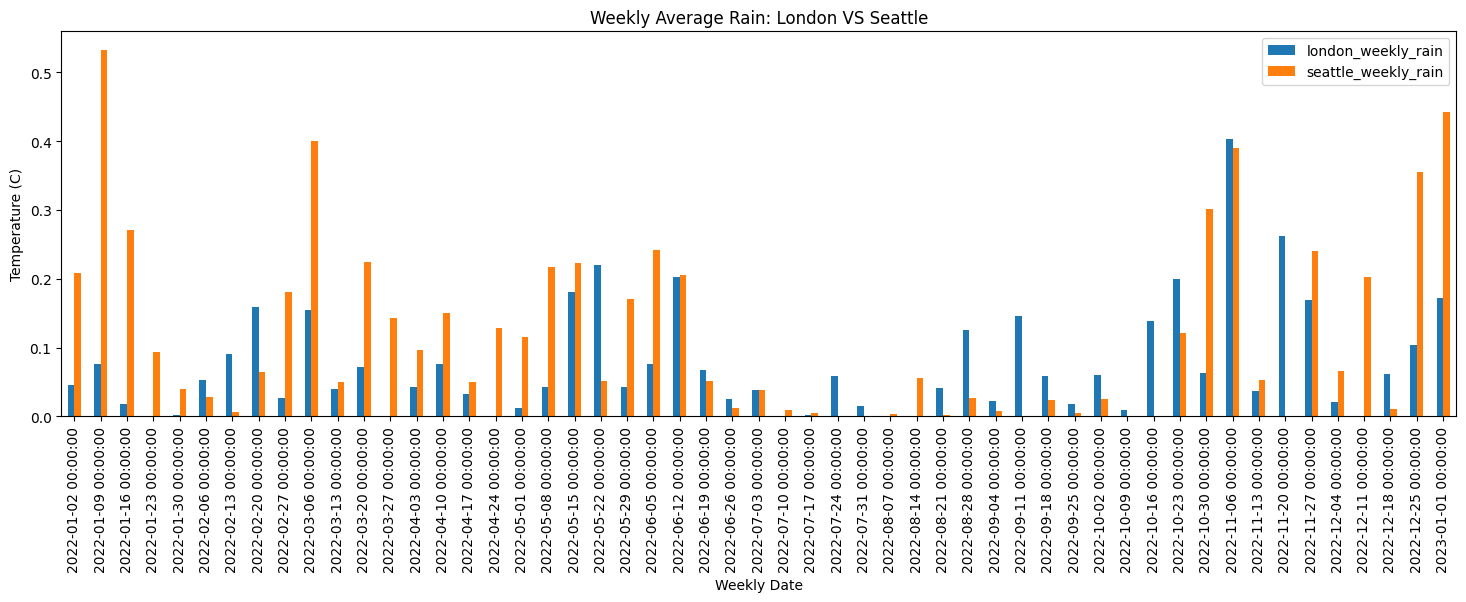

In [82]:
combined_weekly_rain.plot(kind='bar', figsize=(18,5))
plt.title('Weekly Average Rain: London VS Seattle')
plt.xlabel('Weekly Date')
plt.ylabel('Temperature (C)')
plt.show()

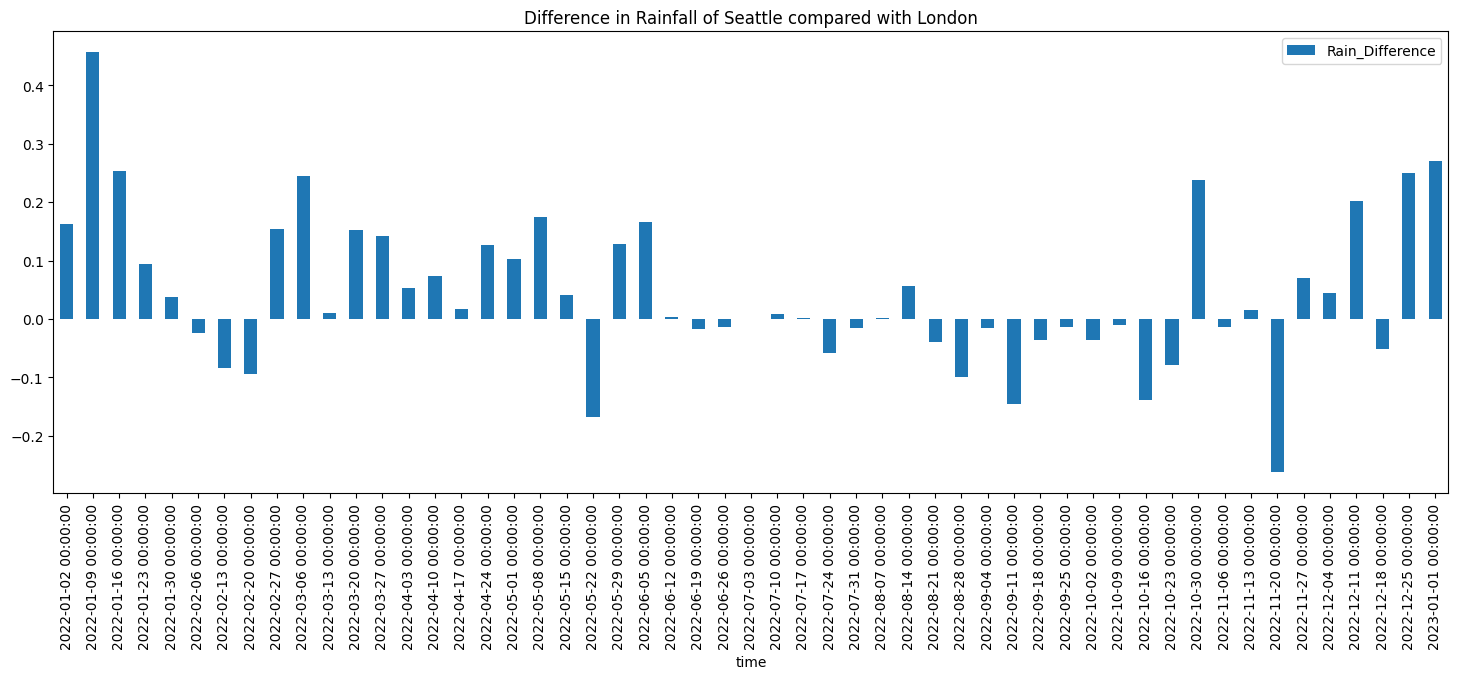

In [92]:
# weekly Rain Difference
combined_weekly_rain['Rain_Difference'] = combined_weekly_rain['seattle_weekly_rain'] - combined_weekly_rain['london_weekly_rain']
combined_weekly_rain.head()
combined_weekly_rain.plot(kind='bar', y='Rain_Difference', figsize=(18,6))
plt.title('Difference in Rainfall of Seattle compared with London')
plt.show()

<b>Conclusion </b>
1. <b>Seattle Weekly rainfall is more </b>than London overall as well as on an Average Statistically from the given data.
2. From Jun 2022 to mid of November 2022, the London weekly rain is more compared to Seattle.
3. Seattle rainfall is very high from Mid of November to January end typically during winter as per Visualization.
4. In the week of May 22, 2022 and November 11,2022 <b> London Rainfall was heavier </b> than Seattle.
5. London has an average rain fall from Jun 19,2022 until October 23,2022, whereas <b> Seattle had lesser rainfall </b> as Compared to London.

In [93]:
# Step 10: Save Data to CSV (Optional)

# Save New York data
df_london.to_csv('london_weather.csv')

# Save Los Angeles data
df_seattle.to_csv('seattle_weather.csv')